In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

In [2]:
# TODO: Add quicksort when fixed
sort_algos = ["SelectionSort", "InsertionSort", "MergeSort", "CountingSort", "NativeSort", "HeapSort", "QuickSort"]

# Load data

In [3]:
data={}
for x in sort_algos:
        data[x]=pd.read_csv("./data/" + x + ".csv")

### Run this cell to visualize all the raw data

In [4]:
for algo, df in data.items():
    print(algo)
    print(df.head(),"\n")

SelectionSort
   power     start_time      stop_time
0      1  1569948367672  1569948367682
1      2  1569948367685  1569948367686
2      3  1569948367687  1569948367689
3      4  1569948367689  1569948367693
4      5  1569948367693  1569948367697 

InsertionSort
   power     start_time      stop_time
0      1  1569948848980  1569948848983
1      2  1569948848983  1569948848984
2      3  1569948848984  1569948848984
3      4  1569948848985  1569948848985
4      5  1569948848986  1569948848987 

MergeSort
   power     start_time      stop_time
0      1  1569948955756  1569948955760
1      2  1569948955760  1569948955761
2      3  1569948955762  1569948955764
3      4  1569948955764  1569948955767
4      5  1569948955768  1569948955775 

CountingSort
   power     start_time      stop_time
0      1  1569948959669  1569948959683
1      2  1569948959683  1569948959687
2      3  1569948959688  1569948959693
3      4  1569948959693  1569948959699
4      5  1569948959700  1569948959706 

Nativ

### Run the next 2 cells to see first dataframe and quick metrics about it

In [5]:
data[sort_algos[0]].head()

,power,start_time,stop_time
0,1,1569948367672,1569948367682
1,2,1569948367685,1569948367686
2,3,1569948367687,1569948367689
3,4,1569948367689,1569948367693
4,5,1569948367693,1569948367697


In [6]:
data[sort_algos[0]].describe()

,power,start_time,stop_time
count,15.000000,1.500000e+01,1.500000e+01
mean,8.000000,1.569948e+12,1.569948e+12
std,4.472136,3.079952e+04,1.251446e+05
min,1.000000,1.569948e+12,1.569948e+12
25%,4.500000,1.569948e+12,1.569948e+12
50%,8.000000,1.569948e+12,1.569948e+12
75%,11.500000,1.569948e+12,1.569948e+12
max,15.000000,1.569948e+12,1.569949e+12


# Creating the new features

- running time in miliseconds<br>
...

In [7]:
def log_time(run_time):
    if run_time ==0:
        run_time=1
    return math.log(run_time,2)
    

In [8]:
for algo, df in data.items():
    # Compute runtime
    df["run_time"] = df.loc[:,"stop_time"] - df.loc[:,"start_time"]
    
    # log of runtime
    df["log_run_time"] = df.loc[:,'run_time'].apply(lambda x: log_time(x))
    
    # number of elements
    df["elements"] = df.loc[:,"power"].apply(lambda x: np.power(2,x))

    


In [9]:
data[sort_algos[0]]

,power,start_time,stop_time,run_time,log_run_time,elements
0,1,1569948367672,1569948367682,10,3.321928,2
1,2,1569948367685,1569948367686,1,0.000000,4
2,3,1569948367687,1569948367689,2,1.000000,8
3,4,1569948367689,1569948367693,4,2.000000,16
4,5,1569948367693,1569948367697,4,2.000000,32
5,6,1569948367699,1569948367706,7,2.807355,64
6,7,1569948367708,1569948367721,13,3.700440,128
7,8,1569948367728,1569948367761,33,5.044394,256
8,9,1569948367766,1569948367874,108,6.754888,512
9,10,1569948367884,1569948368295,411,8.682995,1024


# Plotting runtime for each sort

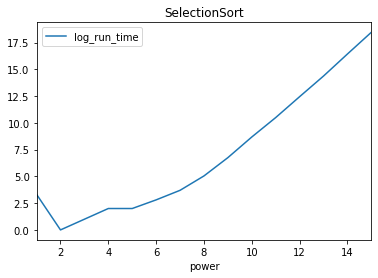

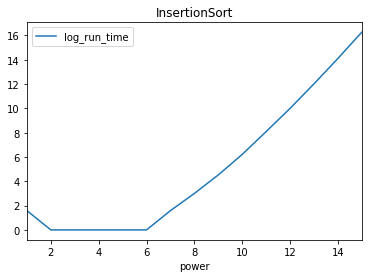

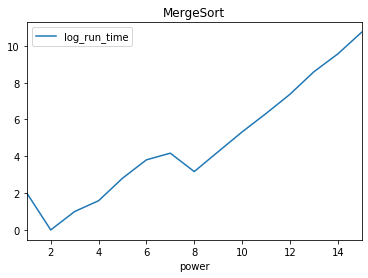

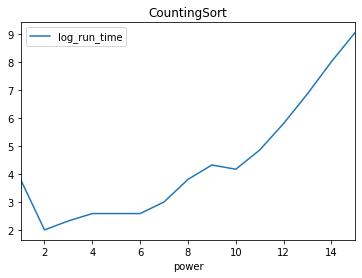

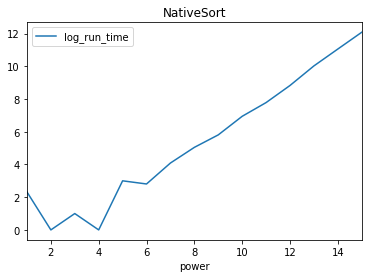

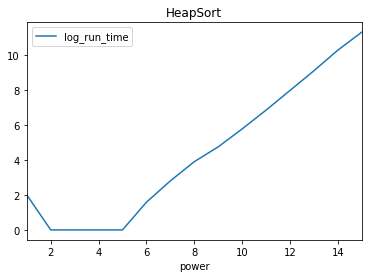

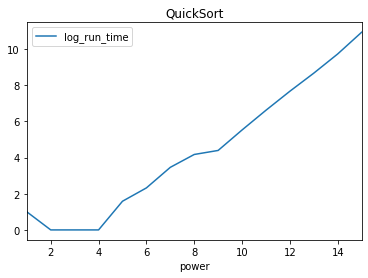

In [10]:
# INDIVIDUAL PLOT
for algo, df in data.items():
    # simply plotting without the log add param `logx = True` or `logy = True` for log on x or y axis to the plot function
    # check pandas dataframe.plot() for more details
    df.plot(x='power', y='log_run_time', title=algo)
plt.show()

SelectionSort
              log_run_time      power
log_run_time     26.316352  14.033814
power            14.033814   7.500000
a: 1.8711752423406638, b: -9.869759952984932 

InsertionSort
              log_run_time      power
log_run_time     25.680078  13.847082
power            13.847082   7.500000
a: 1.8462776050626468, b: -11.889616519685239 

MergeSort
              log_run_time     power
log_run_time      6.919019  7.021781
power             7.021781  7.500000
a: 0.9362375278550547, b: -3.689088882662367 

CountingSort
              log_run_time     power
log_run_time      4.213426  5.454722
power             5.454722  7.500000
a: 0.7272962729805978, b: -2.4535373115834833 

NativeSort
              log_run_time     power
log_run_time      7.592278  7.538422
power             7.538422  7.500000
a: 1.005122884004025, b: -3.0958627314682756 

HeapSort
              log_run_time     power
log_run_time      8.578929  8.016221
power             8.016221  7.500000
a: 1.068829497693138

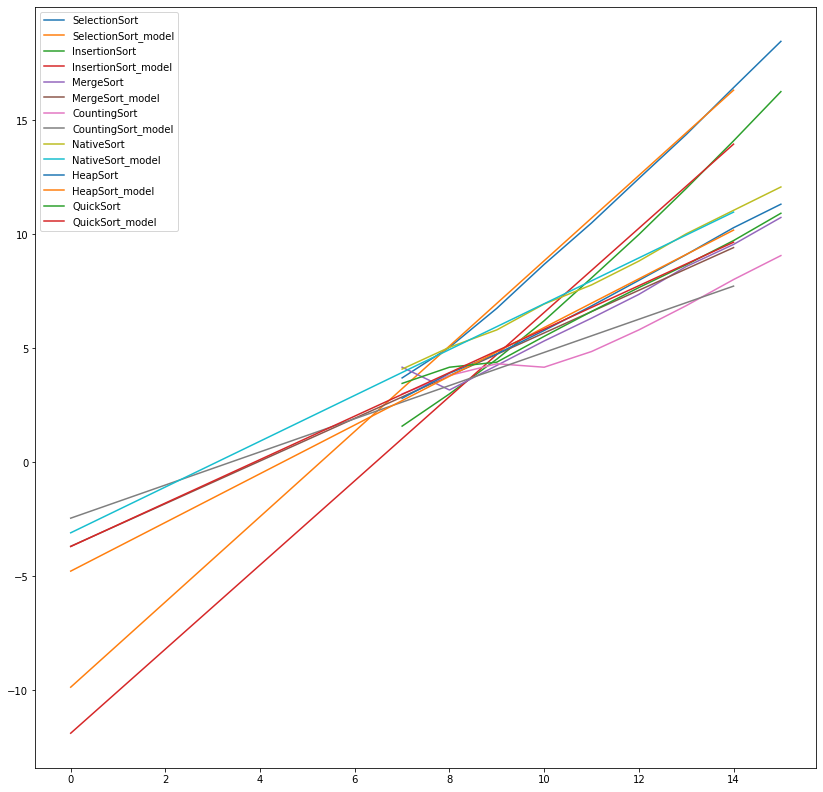

In [21]:
# GROUPED PLOT
fig = plt.figure(figsize=(14, 14))

for algo, df in data.items():
    df = df.iloc[6:]
    plt.plot(df.loc[:,"power"], df.loc[:,"log_run_time"], label=algo)
    
    print(algo)
    
    cov = df.loc[:,['log_run_time','power']].cov().iloc[0][1]
    print(df.loc[:,['log_run_time','power']].cov())

    a = cov/df["power"].var()
    b = df["log_run_time"].mean() - df["power"].mean()*a
    print("a: " + str(a) + ", b: " + str(b),'\n')
    
    x = np.arange(0,15)
    y = x*a + b
    plt.plot(x, y, label=algo+'_model')
    

plt.legend()
plt.show()

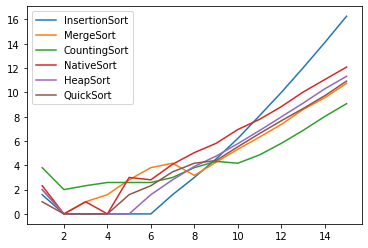

In [12]:
# GROUPED PLOT
fig = plt.figure()

for algo, df in data.items():
    if algo is not "SelectionSort":
        plt.plot(df.loc[:,"power"], df.loc[:,"log_run_time"], label=algo)

plt.legend()
plt.show()

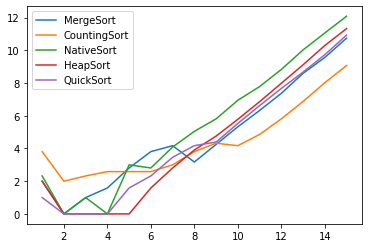

In [13]:
# GROUPED PLOT
fig = plt.figure()

for algo, df in data.items():
    if algo not in ["SelectionSort", "InsertionSort"]:
        plt.plot(df.loc[:,"power"], df.loc[:,"log_run_time"], label=algo)

plt.legend()
plt.show()

# Computing the coeff

In [14]:
data[sort_algos[0]]

,power,start_time,stop_time,run_time,log_run_time,elements
0,1,1569948367672,1569948367682,10,3.321928,2
1,2,1569948367685,1569948367686,1,0.000000,4
2,3,1569948367687,1569948367689,2,1.000000,8
3,4,1569948367689,1569948367693,4,2.000000,16
4,5,1569948367693,1569948367697,4,2.000000,32
5,6,1569948367699,1569948367706,7,2.807355,64
6,7,1569948367708,1569948367721,13,3.700440,128
7,8,1569948367728,1569948367761,33,5.044394,256
8,9,1569948367766,1569948367874,108,6.754888,512
9,10,1569948367884,1569948368295,411,8.682995,1024


SelectionSort
              log_run_time      power
log_run_time     26.316352  14.033814
power            14.033814   7.500000
a: 1.8711752423406638, b: -9.869759952984932 

InsertionSort
              log_run_time      power
log_run_time     25.680078  13.847082
power            13.847082   7.500000
a: 1.8462776050626468, b: -11.889616519685239 

MergeSort
              log_run_time     power
log_run_time      6.919019  7.021781
power             7.021781  7.500000
a: 0.9362375278550547, b: -3.689088882662367 

CountingSort
              log_run_time     power
log_run_time      4.213426  5.454722
power             5.454722  7.500000
a: 0.7272962729805978, b: -2.4535373115834833 

NativeSort
              log_run_time     power
log_run_time      7.592278  7.538422
power             7.538422  7.500000
a: 1.005122884004025, b: -3.0958627314682756 

HeapSort
              log_run_time     power
log_run_time      8.578929  8.016221
power             8.016221  7.500000
a: 1.068829497693138

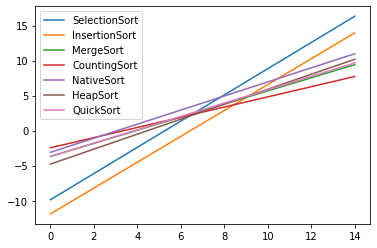

In [22]:
for algo, df in data.items():
    df = df.iloc[6:]
    print(algo)
    
    cov = df.loc[:,['log_run_time','power']].cov().iloc[0][1]
    print(df.loc[:,['log_run_time','power']].cov())

    a = cov/df["power"].var()
    b = df["log_run_time"].mean() - df["power"].mean()*a
    print("a: " + str(a) + ", b: " + str(b),'\n')
    
    x = np.arange(0,15)
    y = x*a + b
    plt.plot(x, y, label=algo)
    
plt.legend()
plt.show()